# FOI requests data analysis

As of September 6, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [6]:
import pandas as pd
import re
import requests
from plotnine import *
pd.set_option("display.max_columns", None)

## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [7]:
df = pd.read_csv('foi_final.csv')
df.tail(10)

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_1526/1295593880.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,level_0,agency,date,title,status,purpose,period_covered,link,index,reason_denial
140918,140918,13672,NAPOCOR,2022-09-06,Agus-Pulangi Hydropower Plants Power Generation,PENDING,Research and development,01/01/2020 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140919,140919,13673,CHED,2022-09-06,Laptop for studies,PENDING,"Thesis, encoding research works and reporting",09/05/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140920,140920,13674,IC,2022-09-06,IC OL and VUL Results,ACCEPTED,For Work Purposes,01/01/2018 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140921,140921,13675,DOH,2022-09-06,To correct surname in Vaxcert certification,PENDING,For Travel Purposes,09/06/2022 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140922,140922,13676,NCDA,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140923,140923,13677,PSA,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140924,140924,13678,BUCOR,2022-09-06,Information about Oplan Galugad,PENDING,Research A basis for capability enhancement fo...,08/31/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140925,140925,13679,DOH,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140926,140926,13669,PNP,2022-09-06,Number of Murder cases from 2019 up to 2022 re...,PENDING,Research study,09/05/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140927,140927,13706,DILG,2022-09-06,"CLUP, CDP, Zoning Map of Cavite",PENDING,Architectural Thesis,08/31/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


## Drop 'Unnamed' column

In [8]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('level_0', axis=1)
df

,agency,date,title,status,purpose,period_covered,link,index,reason_denial
0,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,14191.0,—
1,PAO,2016-11-25,Tax Inquiry,SUCCESSFUL,Personal Reasons,11/01/2016 - 11/15/2016,NaN,14219.0,—
2,DBM,2016-11-25,The Budget for local government buildings proj...,ACCEPTED,Architectural Thesis entitled Cagayan de Oro C...,11/25/2015 - 11/25/2016,NaN,14220.0,—
3,DOTr,2016-11-25,List of certified Remotely Piloted Aircraft Sy...,SUCCESSFUL,Used for infographics and official references ...,01/01/2014 - 11/25/2016,NaN,14221.0,—
4,NAP,2016-11-25,History of Masbate Province,CLOSED,Research and General Information,01/01/1521 - 11/25/2016,NaN,14192.0,—
...,...,...,...,...,...,...,...,...,...
140923,PSA,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140924,BUCOR,2022-09-06,Information about Oplan Galugad,PENDING,Research A basis for capability enhancement fo...,08/31/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140925,DOH,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
140926,PNP,2022-09-06,Number of Murder cases from 2019 up to 2022 re...,PENDING,Research study,09/05/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


## Convert to datetime

In [9]:
df.dtypes

agency             object
date               object
title              object
status             object
purpose            object
period_covered     object
link               object
index             float64
reason_denial      object
dtype: object

In [10]:
df.date = pd.to_datetime(df.date)

In [11]:
df.dtypes

agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
index                    float64
reason_denial             object
dtype: object

## Check for duplicates

There are some duplicates found, but let's check. Remember, we only drop the duplicates if they are the same across **all columns**. Otherwise, we keep them, especially if the same requests are filed with different agencies.

In [12]:
df.duplicated().sum()

0

In [13]:
df[df.duplicated()]

,agency,date,title,status,purpose,period_covered,link,index,reason_denial


## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [14]:
df.isna().sum()

agency                0
date                  0
title                 3
status                0
purpose               2
period_covered        0
link              90765
index             15732
reason_denial     50163
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [15]:
df.status.value_counts(normalize=True) *100

SUCCESSFUL                37.627015
DENIED                    23.155796
PENDING                   15.734276
PARTIALLY SUCCESSFUL       6.743160
ACCEPTED                   6.731097
AWAITING CLARIFICATION     3.582681
CLOSED                     2.457993
REFERRED                   2.409032
PROCESSING                 1.512120
EXTENDED                   0.046832
Name: status, dtype: float64

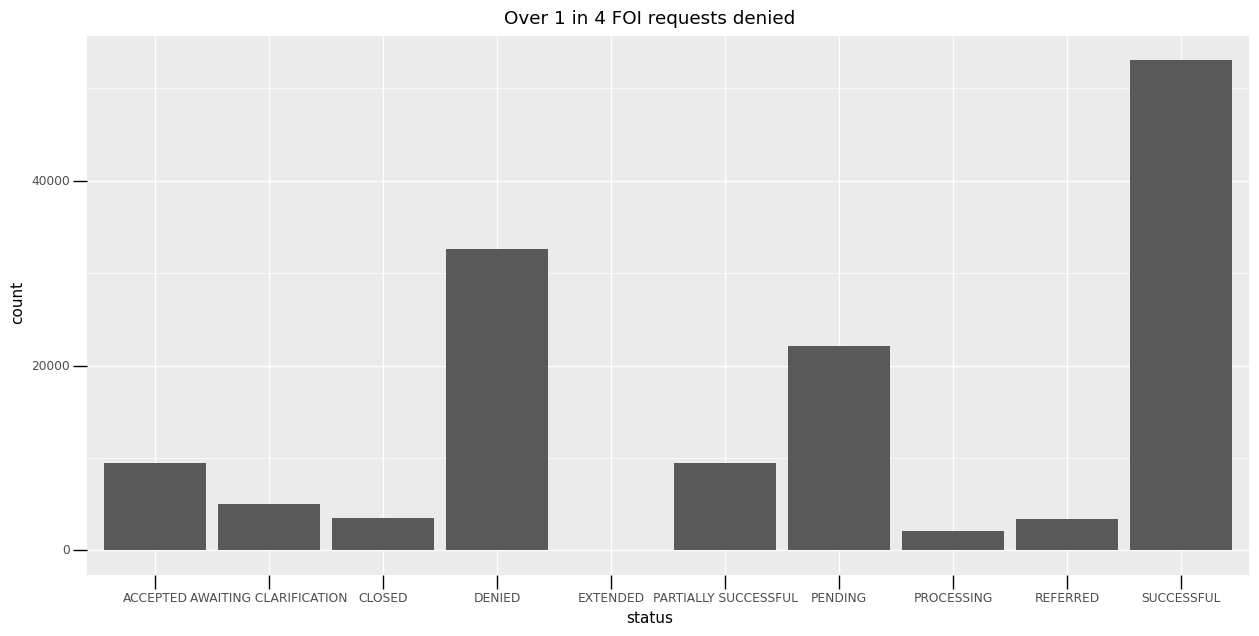

<ggplot: (309929582)>

In [16]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [17]:
df.agency.value_counts().head(10)

DOH      13811
PSA       7983
DOLE      6165
BIR       6102
DepEd     5805
SSS       5171
DSWD      4931
NTC       4313
OWWA      4302
DPWH      3514
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [18]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     3367
DSWD    3060
DENR    1409
NBI     1370
DOH     1190
DTI     1106
DOLE     878
DOTr     838
HDMF     810
NTC      778
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [19]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate           433
Vaxcert                           298
VaxCert                           145
Vaccination Card                  135
Vaccine Certificate               127
Lost Vaccination Card             113
Vaccination certificate           105
Lost Vaccine Card                  97
VAXCERT                            80
Vax Cert                           73
Vax Certificate                    67
VACCINATION CERTIFICATE            60
Vaccination card                   59
Vaccine certificate                58
VaxCertPH                          53
Vaxcert; incorrect middle name     49
vaxcert                            46
Vaccine Card                       38
Vaxcertificate                     37
vaccination certificate            36
Name: title, dtype: int64

In [20]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

agency            1748
date              1748
title             1748
status            1748
purpose           1748
period_covered    1748
link              1312
index             1458
reason_denial      436
dtype: int64

Interpretation: Over one in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [21]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,index,reason_denial
0,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,42321.0,—
1,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,42950.0,—
2,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,42941.0,—
3,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,43098.0,—
4,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,43248.0,—
5,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,43338.0,—
6,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,43357.0,—
7,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,43616.0,—
8,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,43614.0,incomplete-request
9,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,43779.0,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [22]:
df_sap.count()
#180 requests about SAP.

agency            182
date              182
title             182
status            182
purpose           182
period_covered    182
link                7
index             179
reason_denial     175
dtype: int64

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [23]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    598
True     425
Name: title, dtype: int64

Interpretation: 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [24]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification', 'tax', 'tax records']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.tail(20)

,agency,date,title,status,purpose,period_covered,link,index,reason_denial
1641,BIR,2022-08-24,Income Tax Return,AWAITING CLARIFICATION,I will use this for my visa application abroad.,01/01/2016 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1642,BIR,2022-08-27,BIR 2316,PARTIALLY SUCCESSFUL,Will submit to my new employer.,08/27/2022 - 08/27/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1643,BIR,2022-08-27,Income Tax Return,AWAITING CLARIFICATION,Housing loan application,07/13/2016 - 08/27/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1644,BIR,2022-08-27,ITR,PENDING,Employment purposes,05/21/2019 - 05/15/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1645,BIR,2022-08-27,ITR,AWAITING CLARIFICATION,Employment purposes,05/21/2019 - 05/15/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1646,BIR,2022-08-27,Income Tax Return,PENDING,Housing loan application,07/13/2016 - 08/27/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1647,BIR,2022-08-27,BIR 2316,PENDING,Will submit to my new employer.,08/27/2022 - 08/27/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1648,BIR,2022-08-28,Form 2316,AWAITING CLARIFICATION,For Employment Requirements,06/01/2020 - 03/13/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1649,BIR,2022-08-28,Form 2316,PENDING,For Employment Requirements,06/01/2020 - 03/13/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
1650,BIR,2022-08-28,INCOME TAX RETURN,AWAITING CLARIFICATION,For credit card application,01/01/2022 - 08/27/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


In [25]:
df_tax.status.value_counts()

DENIED                    745
AWAITING CLARIFICATION    580
SUCCESSFUL                104
PENDING                    98
PARTIALLY SUCCESSFUL       54
ACCEPTED                   49
REFERRED                   17
CLOSED                      8
PROCESSING                  5
EXTENDED                    1
Name: status, dtype: int64

In [26]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    44.852498
AWAITING CLARIFICATION    34.918724
SUCCESSFUL                 6.261288
PENDING                    5.900060
PARTIALLY SUCCESSFUL       3.251054
ACCEPTED                   2.950030
REFERRED                   1.023480
CLOSED                     0.481638
PROCESSING                 0.301023
EXTENDED                   0.060205
Name: status, dtype: float64

# Top purpose of requests

In [27]:
df.purpose.value_counts(ascending=False).head(10)

Research                    11312
Research and Development     5562
Thesis                       2360
Undergraduate Thesis         2305
Research and development     2178
Architectural Thesis         1967
Academic Research             941
Thesis Research               906
research                      683
Undergraduate Research        558
Name: purpose, dtype: int64

## For academic purposes

In [28]:
research = df.purpose.str.extractall(r'(.*\bresearch.+)', re.IGNORECASE)
research

,,0
,match,
4,0,Research and General Information
5,0,School Paper Research(Thesis)
11,0,Research and development
17,0,Research for Cebu City Development to be used ...
20,0,Research for alternative solution in EDSA Traf...
...,...,...
140915,0,"Research, development, and publication for PSA..."
140918,0,Research and development
140919,0,"Thesis, encoding research works and reporting"


In [29]:
thesis = df.purpose.str.extractall(r'(.*\bthesis.+)', re.IGNORECASE)
thesis

,,0
,match,
2,0,Architectural Thesis entitled Cagayan de Oro C...
5,0,School Paper Research(Thesis)
8,0,Thesis Research
17,0,Research for Cebu City Development to be used ...
102,0,Research / Possible Thesis Study
...,...,...
140848,0,Thesis Purposes
140879,0,Thesis research (Foreign Service major)
140904,0,Thesis Purposes


In [30]:
academic = df.purpose.str.extractall(r'(.*\bacademic.+)', re.IGNORECASE)
academic

,,0
,match,
92,0,Academic research
365,0,Academic research
387,0,Academic Research
458,0,Academic research
462,0,Academic Research
...,...,...
140655,0,For the academic architectural research thesis...
140695,0,Academic Research and Case study
140743,0,Academic Research


In [31]:
research_2 = pd.concat([research, academic, thesis], ignore_index=True)
research_2.columns= ['purpose']
research_2

,purpose
0,Research and General Information
1,School Paper Research(Thesis)
2,Research and development
3,Research for Cebu City Development to be used ...
4,Research for alternative solution in EDSA Traf...
...,...
37585,Thesis Purposes
37586,Thesis research (Foreign Service major)
37587,Thesis Purposes
37588,Thesis Purposes


In [32]:
# research_2 = research_2.merge(df, on='purpose')
# research_2.duplicated().value_counts()

In [33]:
#research_2[research_2.duplicated()]

## For journalistic purposes

In [34]:
news = df.purpose.str.extractall(r'(.*\bnews.+)', re.IGNORECASE)
news

,,0
,match,
72,0,news article
75,0,news article
89,0,News report
182,0,"This will be used for the verification of ""new..."
250,0,Research and news article
...,...,...
138562,0,research for news reports
139481,0,Research and validation of news articles claim...
139579,0,News article


In [35]:
media = df.purpose.str.extractall(r'(.*\bmedia.+)', re.IGNORECASE)

In [36]:
journalism = pd.concat([news, media], ignore_index=True)
journalism.columns= ['purpose']
journalism

,purpose
0,news article
1,news article
2,News report
3,"This will be used for the verification of ""new..."
4,Research and news article
...,...
545,Media research
546,Media research
547,Media research
548,For media purposes.


In [37]:
journalism = journalism.merge(df, on='purpose')
journalism.duplicated().sum()

1978

In [38]:
journalism = journalism.drop_duplicates().reset_index()

In [39]:
journalism

,level_0,purpose,agency,date,title,status,period_covered,link,index,reason_denial
0,0,news article,PNP,2016-11-27,PNP Region 9 Director Billy Beltran and PNP Ge...,DENIED,06/01/2016 - 07/02/2016,NaN,14265.0,incomplete-request
1,1,news article,PNP,2016-11-27,oplan tokhang,SUCCESSFUL,07/01/2016 - 11/02/2016,NaN,14261.0,—
2,4,News report,DBM,2016-11-28,"Cost of President Duterte's trip to Laos, Chin...",DENIED,09/05/2016 - 11/23/2016,NaN,14278.0,—
3,5,News report,PCOO,2017-01-27,Cost of each of President Duterte's foreign tr...,DENIED,09/05/2016 - 12/17/2016,NaN,14577.0,wrong-agency
4,6,News report,PDEA,2017-11-21,Statistics on drug prices,DENIED,07/01/2016 - 11/21/2017,NaN,16675.0,—
...,...,...,...,...,...,...,...,...,...,...
535,2511,Media research and article,DOJ,2022-07-11,Data of cyberlibel cases,SUCCESSFUL,09/12/2012 - 07/11/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
536,2512,Online lending apps harassing my sister and he...,NPC,2022-07-13,Invading of personal information and cyber har...,PENDING,07/13/2022 - 07/13/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
537,2513,Online lending apps harassing my sister and he...,NPC,2022-07-13,Invading of personal information and cyber har...,DENIED,07/13/2022 - 07/13/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
538,2516,For media purposes.,PNP,2022-08-08,PRESS RELEASE on CTG members surrenders to BEN...,SUCCESSFUL,08/02/2022 - 08/08/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [40]:
df[df.agency=="OP"]
#There were some requests for SALN.

,agency,date,title,status,purpose,period_covered,link,index,reason_denial
2563,OP,2017-12-01,Total cost/expenses for the foreign trips of P...,PENDING,For research purposes for my year-end report f...,01/01/2017 - 12/01/2017,NaN,16755.0,—
2590,OP,2017-12-04,Cost of President Duterte's foreign trips in h...,PENDING,News research,07/01/2016 - 07/01/2017,NaN,16788.0,—
2610,OP,2017-12-05,Updates on the appeals of suspended and closed...,PENDING,Research,02/02/2017 - 12/05/2017,NaN,16793.0,—
2703,OP,2017-12-24,2018 General Appropriations Act,PENDING,Factual basis in research and review of certai...,12/24/2017 - 12/24/2017,NaN,16894.0,—
2720,OP,2017-12-30,Executive Order 126 dated 1959,PENDING,HISTORY,12/30/2017 - 12/30/2017,NaN,16912.0,—
3028,OP,2018-01-31,NSC Group Photos with Living Former Presidents,PENDING,Research and Archive purposes.,07/27/2016 - 07/27/2016,NaN,17215.0,—
3166,OP,2018-02-11,What is the counterpart of the CIA in the Phil...,PENDING,Research,02/11/2018 - 02/11/2018,NaN,17369.0,—
3170,OP,2018-02-11,Breakdown of War Materiel used by the AFP in t...,PENDING,Research for Graduate School class.,05/23/2017 - 11/23/2017,NaN,17373.0,—
3181,OP,2018-02-11,Documentary proof or evidence of President Dut...,PENDING,Research for Graduate School class.,03/28/1945 - 02/11/2018,NaN,17357.0,—
3211,OP,2018-02-13,Actual Expenses of ASEAN 2017 budget,PENDING,Research purposes,01/01/2017 - 01/01/2018,NaN,17415.0,—


## Government contracts

In [41]:
contract = ['contract', 'contracts', 'audit', 'audit report', 'Audit report', 'Audit Report', 'Contract', 'Contracts', 'loan agreement', 'Agreements', 'Agreement', 'agreement', 'agreements']
df_contract = df[df['title'].isin(contract)].reset_index(drop=True)
df_contract.head(7)


,agency,date,title,status,purpose,period_covered,link,index,reason_denial
0,LRTA,2019-03-29,Contract,DENIED,For own personal use or information,01/01/2018 - 12/31/2018,NaN,26023.0,—
1,DFA,2021-03-14,Audit Report,DENIED,Research Purpose,01/01/2018 - 07/30/2020,NaN,70124.0,information-available-online
2,PPPC,2022-06-19,Contracts,ACCEPTED,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,13785.0,NaN
3,LRA,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,12198.0,NaN
4,LTO,2022-06-19,Contract,PENDING,Research,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,12197.0,NaN
5,PPPC,2022-06-19,Contracts,DENIED,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
6,PPPC,2022-06-19,Contracts,PENDING,Research and Development,06/19/2020 - 06/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,12199.0,NaN


## Top reasons for denial

Applicable only to data as of December 2021.

In [42]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77314
NaN                             50163
wrong-agency                     6980
incomplete-request               2764
invalid-request                  2084
information-available-online     1620
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

In [43]:
df[df.reason_denial=='wrong-agency'].tail(10)

,agency,date,title,status,purpose,period_covered,link,index,reason_denial
89768,DOTr,2021-12-18,Car Makers' Market Share in the Philippines,DENIED,thesis,01/01/2016 - 12/01/2021,NaN,103912.0,wrong-agency
89770,CHED,2021-12-18,Request for laptop,DENIED,Educational and future career purposes.,11/26/2021 - 12/18/2021,NaN,103931.0,wrong-agency
89844,PH,2021-12-19,Vaccination Certificate,DENIED,To Travel,06/14/2021 - 07/12/2021,NaN,104008.0,wrong-agency
89848,PH,2021-12-19,VaccinationCertificate,DENIED,To travel,06/14/2021 - 07/12/2021,NaN,104010.0,wrong-agency
89849,NTC,2021-12-19,Requesting for Individual/Company name uses th...,DENIED,All my contacts got an sms blast from this num...,12/19/2021 - 12/19/2021,NaN,104013.0,wrong-agency
90022,DENR,2021-12-21,Certificate of ancestral domain title in Sioco...,DENIED,To verify that who is the head of CADT in Siti...,12/21/2021 - 12/21/2021,NaN,104252.0,wrong-agency
90205,CHED,2021-12-23,Registration Form 001,DENIED,Employment Requirements,01/01/2018 - 12/23/2021,NaN,104450.0,wrong-agency
90452,NAP,2021-12-27,Birth Record,DENIED,SSS Funeral Benefit,07/09/1943 - 07/09/1945,NaN,104587.0,wrong-agency
90508,DAR,2021-12-28,"CLUP and Zoning Ordinance of Angono, Rizal",DENIED,Research,12/28/2021 - 12/28/2021,NaN,104785.0,wrong-agency
90764,DOJ,2021-12-31,INFORMATION,DENIED,RESOLUTION AND INFORMATION,11/19/2021 - 12/31/2021,NaN,104936.0,wrong-agency


In [44]:
df.status.value_counts()

SUCCESSFUL                53027
DENIED                    32633
PENDING                   22174
PARTIALLY SUCCESSFUL       9503
ACCEPTED                   9486
AWAITING CLARIFICATION     5049
CLOSED                     3464
REFERRED                   3395
PROCESSING                 2131
EXTENDED                     66
Name: status, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [45]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    140640
True        285
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [46]:
saln = df.title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE)
saln.columns= ['title']
#374 requests mentioning SALN.

In [47]:
saln = saln.merge(df, on='title')
saln

,title,agency,date,status,purpose,period_covered,link,index,reason_denial
0,SALN of Bongbong Marcos,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,14223.0,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,14332.0,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,14462.0,wrong-agency
3,The SALNs of each of the cabinet members of th...,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,14480.0,—
4,The SALNs of Presidents Aquino and Duterte's C...,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,14534.0,—
...,...,...,...,...,...,...,...,...,...
466,"CDLB, SALN & PDS",PNP,2022-08-06,PENDING,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
467,"CDLB, SALN & PDS",PNP,2022-08-06,DENIED,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
468,"CDLB, SALN & PDS",PNP,2022-08-06,PENDING,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
469,"CDLB, SALN & PDS",PNP,2022-08-06,DENIED,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


In [48]:
saln = saln.drop_duplicates()
saln

,title,agency,date,status,purpose,period_covered,link,index,reason_denial
0,SALN of Bongbong Marcos,DOTr,2016-11-25,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN,14223.0,wrong-agency
1,"SALN of the following: Ronnan Y. Pado, Ernani ...",DOF,2016-12-05,DENIED,Transparency,12/31/2015 - 12/31/2015,NaN,14332.0,incomplete-request
2,SALN of Niño Maximino A. Lazaro Municipal Coun...,DOF,2016-12-17,DENIED,Public Information,07/01/2013 - 12/31/2015,NaN,14462.0,wrong-agency
3,The SALNs of each of the cabinet members of th...,PCOO,2016-12-23,SUCCESSFUL,news reporting/public information,06/30/2016 - 12/23/2016,NaN,14480.0,—
4,The SALNs of Presidents Aquino and Duterte's C...,PCOO,2017-01-18,SUCCESSFUL,Research,06/30/2016 - 06/30/2016,NaN,14534.0,—
...,...,...,...,...,...,...,...,...,...
462,"The latest Statement of Assets, Liabilities, a...",CCP,2022-06-22,PENDING,Research and Development,06/22/2022 - 06/22/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,13428.0,NaN
465,Request for SALN Copy of the Mayors of Buruang...,DILG,2022-07-15,DENIED,Research,01/01/2004 - 07/15/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
466,"CDLB, SALN & PDS",PNP,2022-08-06,PENDING,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
467,"CDLB, SALN & PDS",PNP,2022-08-06,DENIED,Proof of updated record,01/01/2015 - 08/01/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


In [49]:
saln.to_csv('saln.csv')

In [50]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\bSALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

76

## Drug war

In [51]:
drug_war = df.title.str.extractall(r'(.*\bdrug war.+)', re.IGNORECASE)

In [52]:
war_on_drugs = df.title.str.extractall(r'(.*\bwar on drugs.+)', re.IGNORECASE)

In [53]:
drugs = pd.concat([drug_war, war_on_drugs], ignore_index=True)
drugs

,0
0,Impact of Drug War on Children
1,DOJ drug war panel preliminary report
2,Data breakdown of drug war cases
3,Drug war orphans
4,Drug war orphans
5,Drug war orphans
6,Drug war orphans
7,Drug war orphans
8,"Statistics on war on drugs nationwide AND, spe..."
9,War On Drugs/Oplan Tokhang


In [54]:
drugs.columns= ['title']

In [55]:
drugs = drugs.merge(df, on='title')
drugs

,title,agency,date,status,purpose,period_covered,link,index,reason_denial
0,Impact of Drug War on Children,DSWD,2020-03-02,DENIED,academic research,06/01/2016 - 03/02/2020,NaN,40552.0,—
1,DOJ drug war panel preliminary report,DOJ,2021-06-14,DENIED,For media report,06/01/2020 - 02/01/2021,NaN,77838.0,—
2,Data breakdown of drug war cases,DOJ,2021-06-21,ACCEPTED,For media research and report,06/01/2016 - 05/31/2020,NaN,78494.0,—
3,Drug war orphans,PNP,2022-08-10,SUCCESSFUL,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
4,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
5,Drug war orphans,PSA,2022-08-10,PENDING,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
6,Drug war orphans,DSWD,2022-08-10,PROCESSING,Undergraduate thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
7,Drug war orphans,PSA,2022-08-10,PARTIALLY SUCCESSFUL,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
8,Drug war orphans,PNP,2022-08-10,SUCCESSFUL,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN
9,Drug war orphans,PNP,2022-08-10,ACCEPTED,Undergraduate Thesis,06/01/2014 - 08/10/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN


## Track request numbers through time

### By month

In [56]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

,date,title
66,2022-05-31,4180
67,2022-06-30,7450
68,2022-07-31,4723
69,2022-08-31,6503
70,2022-09-30,989


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


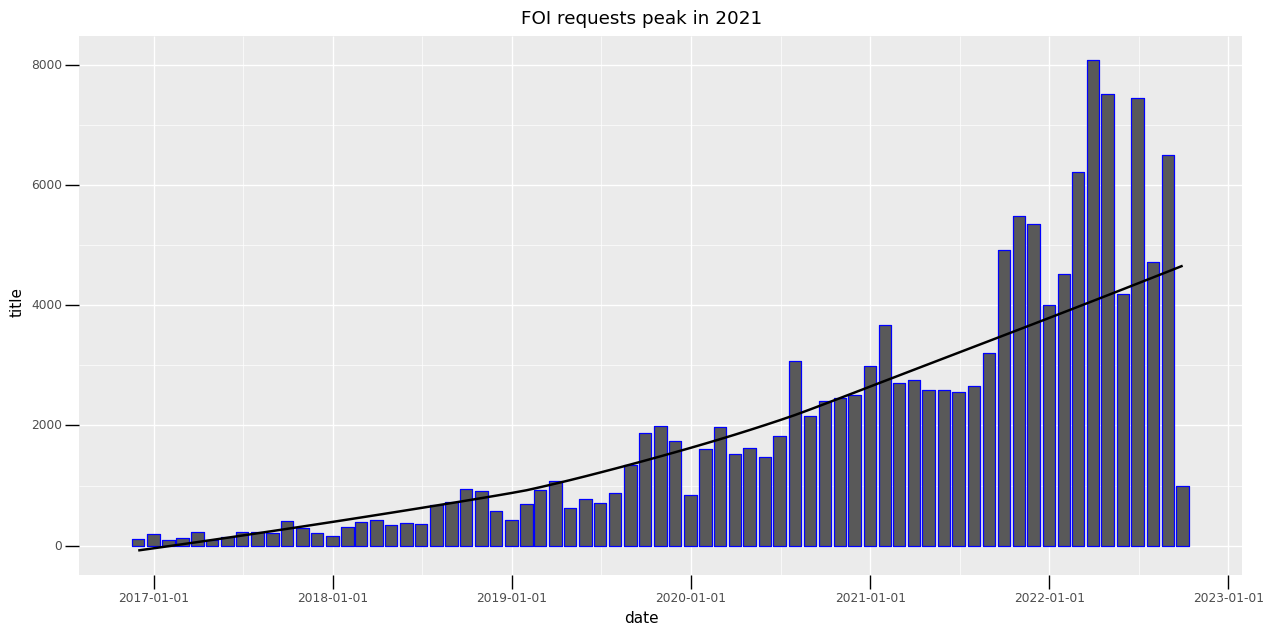

<ggplot: (316123088)>

In [57]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat="identity") + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [58]:
month_query = df.resample('M', on='date').title.count().sort_values(ascending=False)
month_query.head(10)
#Largest number of FOI requests recorded in February 2022.

date
2022-03-31    8072
2022-04-30    7513
2022-06-30    7450
2022-08-31    6503
2022-02-28    6218
2021-10-31    5481
2021-11-30    5349
2021-09-30    4917
2022-07-31    4723
2022-01-31    4514
Name: title, dtype: int64

### By year

In [59]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,311
1,2017-12-31,2413
2,2018-12-31,6484
3,2019-12-31,13489
4,2020-12-31,25588
5,2021-12-31,42478
6,2022-12-31,50162


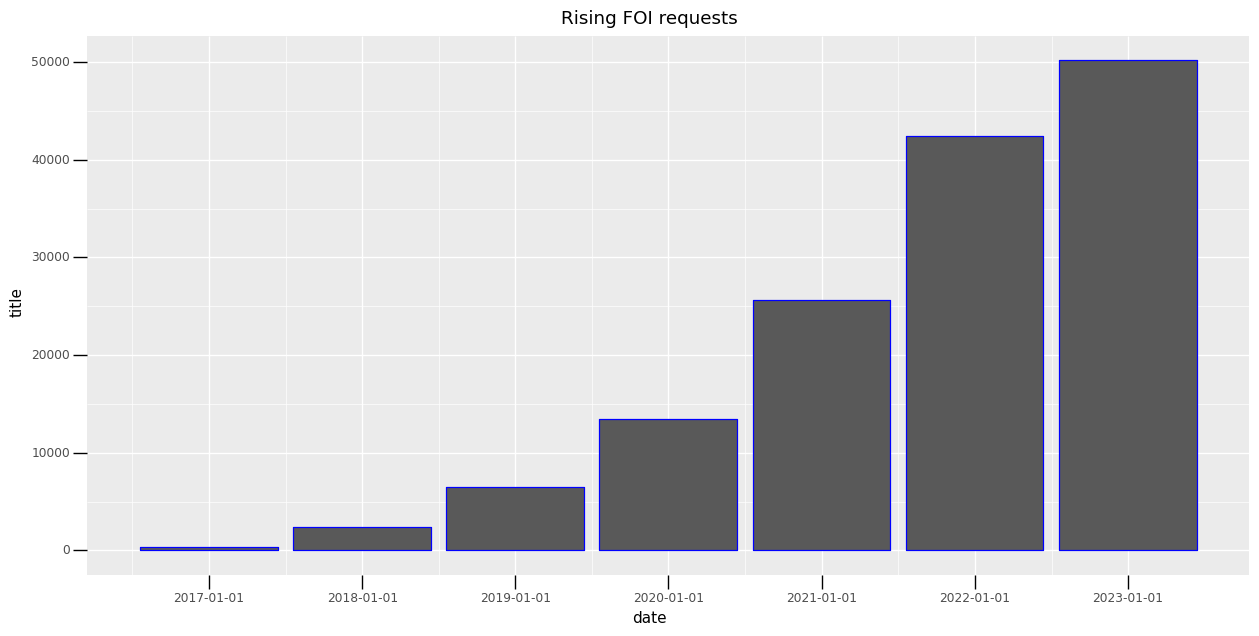

<ggplot: (315780078)>

In [60]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [61]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    675.884244
2018-12-31    168.711148
2019-12-31    108.035163
2020-12-31     89.695307
2021-12-31     66.007504
2022-12-31     18.089364
Freq: A-DEC, Name: title, dtype: float64

## Percentage of denied each month

In [62]:
denied = df[df.status=='DENIED'].resample('A', on='date').agency.count().to_frame().reset_index()
deny = denied.merge(year_query, how='inner', on='date') #merge denied df with year_query
deny.columns= ['date', 'denials', 'total_requests'] #rename columns

In [63]:
deny ['pct_denied'] = (deny.denials / deny.total_requests) * 100
deny

,date,denials,total_requests,pct_denied
0,2016-12-31,120,311,38.585209
1,2017-12-31,1036,2413,42.934107
2,2018-12-31,2289,6484,35.302283
3,2019-12-31,4372,13489,32.411595
4,2020-12-31,7211,25588,28.181179
5,2021-12-31,9983,42478,23.501577
6,2022-12-31,7622,50162,15.194769


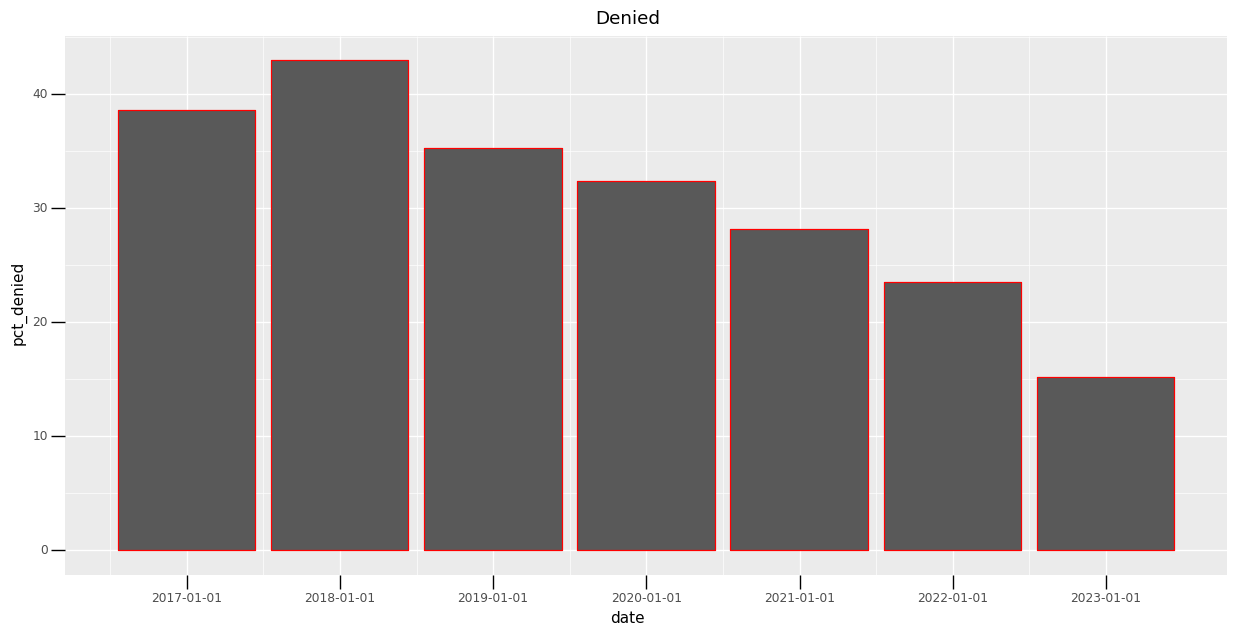

<ggplot: (316149190)>

In [64]:
(
    ggplot(deny, aes(x="date", y="pct_denied")) + 
    geom_col(color="red", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Denied")
)

## Percentage closed

These are requests which were closed after 60 days of non-response from the requestor when the FOI officer asked for clarification of the request.

In [65]:
closed = df[df.status=='CLOSED'].resample('M', on='date').agency.count().to_frame().reset_index()
close = closed.merge(month_query, how='inner', on='date') #merge closed df with year_query
close.columns= ['date', 'closures', 'total_requests'] #rename columns

In [66]:
close.head()

,date,closures,total_requests
0,2016-11-30,13,117
1,2016-12-31,31,194
2,2017-01-31,7,93
3,2017-02-28,11,127
4,2017-03-31,7,222


In [67]:
close ['pct_closed'] = (close.closures / close.total_requests) * 100
close.head()

,date,closures,total_requests,pct_closed
0,2016-11-30,13,117,11.111111
1,2016-12-31,31,194,15.979381
2,2017-01-31,7,93,7.526882
3,2017-02-28,11,127,8.661417
4,2017-03-31,7,222,3.153153


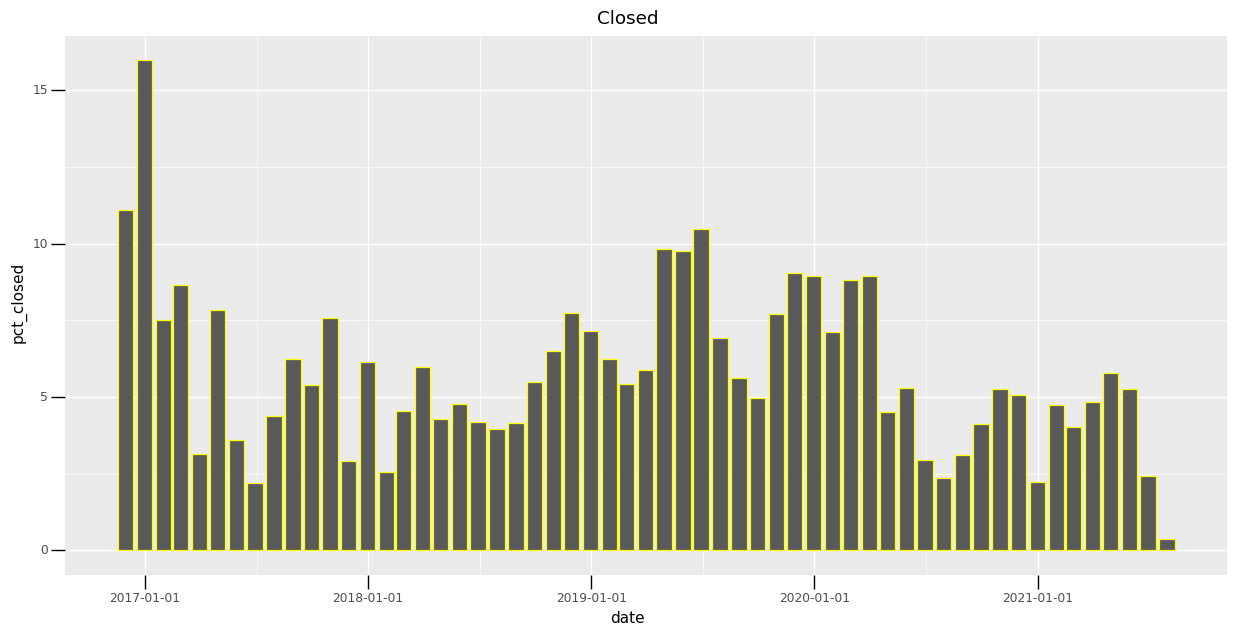

<ggplot: (315864209)>

In [68]:
(
    ggplot(close, aes(x="date", y="pct_closed")) + 
    geom_col(color="yellow", stat='identity') + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Closed")
)

## Percentage approved

In [69]:
approved = df[df.status=='ACCEPTED'].resample('M', on='date').agency.count().to_frame().reset_index()
approve = approved.merge(month_query, how='inner', on='date') #merge approved df with year_query
approve.columns= ['date', 'approvals', 'total_requests'] #rename columns
approve

,date,approvals,total_requests
0,2016-11-30,13,117
1,2016-12-31,3,194
2,2017-01-31,1,93
3,2017-02-28,4,127
4,2017-03-31,9,222
...,...,...,...
66,2022-05-31,490,4180
67,2022-06-30,756,7450
68,2022-07-31,404,4723
69,2022-08-31,695,6503


In [70]:
approve ['pct_approve'] = (approve.approvals / approve.total_requests) * 100
approve

,date,approvals,total_requests,pct_approve
0,2016-11-30,13,117,11.111111
1,2016-12-31,3,194,1.546392
2,2017-01-31,1,93,1.075269
3,2017-02-28,4,127,3.149606
4,2017-03-31,9,222,4.054054
...,...,...,...,...
66,2022-05-31,490,4180,11.722488
67,2022-06-30,756,7450,10.147651
68,2022-07-31,404,4723,8.553885
69,2022-08-31,695,6503,10.687375


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


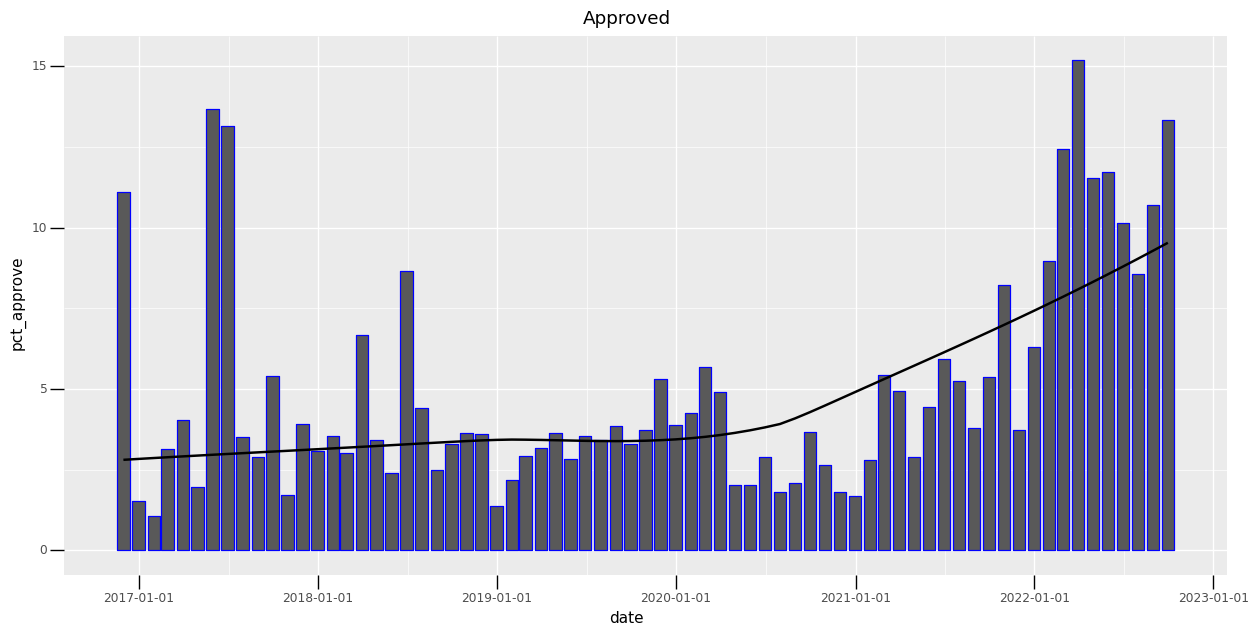

<ggplot: (315838296)>

In [71]:
(
    ggplot(approve, aes(x="date", y="pct_approve")) + 
    geom_col(color="blue", stat='identity') + 
    geom_smooth()+
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Approved")
)

In [72]:
df[df.status=="DENIED"].resample('D', on='date').agency.count().mean()

15.45123106060606

## Regression

Our questions are:

- What are the odds that your FOI request will be denied if your purpose is for media use?
- Which agency is more likely to deny an FOI request?

In [73]:
df.status.value_counts()

SUCCESSFUL                53027
DENIED                    32633
PENDING                   22174
PARTIALLY SUCCESSFUL       9503
ACCEPTED                   9486
AWAITING CLARIFICATION     5049
CLOSED                     3464
REFERRED                   3395
PROCESSING                 2131
EXTENDED                     66
Name: status, dtype: int64

In [74]:
df['status_code'] = df.status.replace({'SUCCESSFUL' or 'PARTIALLY SUCCESSFUL': 1, 'DENIED': 0})

In [75]:
df

,agency,date,title,status,purpose,period_covered,link,index,reason_denial,status_code
0,DICT,2016-11-25,Projects to be implemented by the DICT for the...,ACCEPTED,Research,11/25/2016 - 11/25/2016,NaN,14191.0,—,ACCEPTED
1,PAO,2016-11-25,Tax Inquiry,SUCCESSFUL,Personal Reasons,11/01/2016 - 11/15/2016,NaN,14219.0,—,1
2,DBM,2016-11-25,The Budget for local government buildings proj...,ACCEPTED,Architectural Thesis entitled Cagayan de Oro C...,11/25/2015 - 11/25/2016,NaN,14220.0,—,ACCEPTED
3,DOTr,2016-11-25,List of certified Remotely Piloted Aircraft Sy...,SUCCESSFUL,Used for infographics and official references ...,01/01/2014 - 11/25/2016,NaN,14221.0,—,1
4,NAP,2016-11-25,History of Masbate Province,CLOSED,Research and General Information,01/01/1521 - 11/25/2016,NaN,14192.0,—,CLOSED
...,...,...,...,...,...,...,...,...,...,...
140923,PSA,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN,PENDING
140924,BUCOR,2022-09-06,Information about Oplan Galugad,PENDING,Research A basis for capability enhancement fo...,08/31/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN,PENDING
140925,DOH,2022-09-06,Statistics of visually impaired individuals,PENDING,Bachelor's Thesis,09/06/2017 - 09/06/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN,PENDING
140926,PNP,2022-09-06,Number of Murder cases from 2019 up to 2022 re...,PENDING,Research study,09/05/2022 - 09/05/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN,NaN,PENDING
